# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='	')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

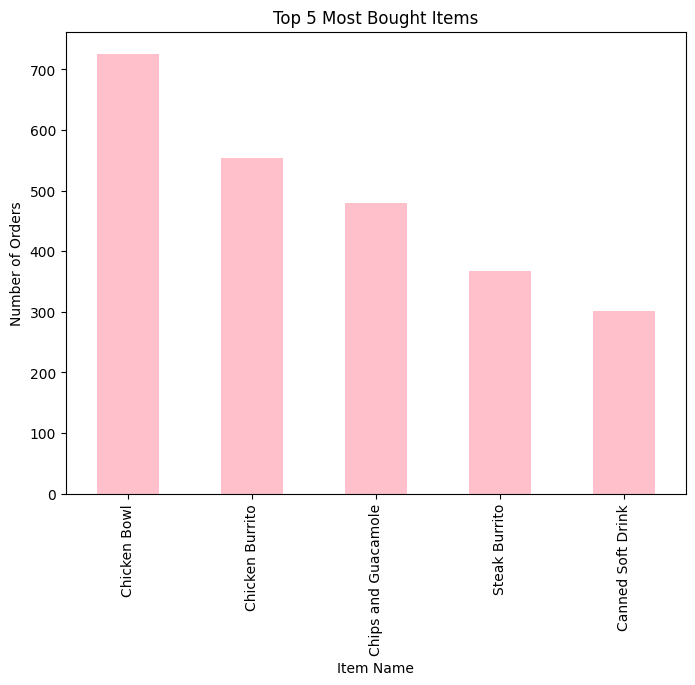

In [6]:
top5=chipo['item_name'].value_counts().head(5)

plt.figure(figsize=(8,6))
top5.plot(kind='bar', color='pink')
plt.title('Top 5 Most Bought Items')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [7]:
chipo.head(4)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39


<ipython-input-8-19fc451c4ff3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price']= chipo['item_price'].str.replace('$','').astype(float)


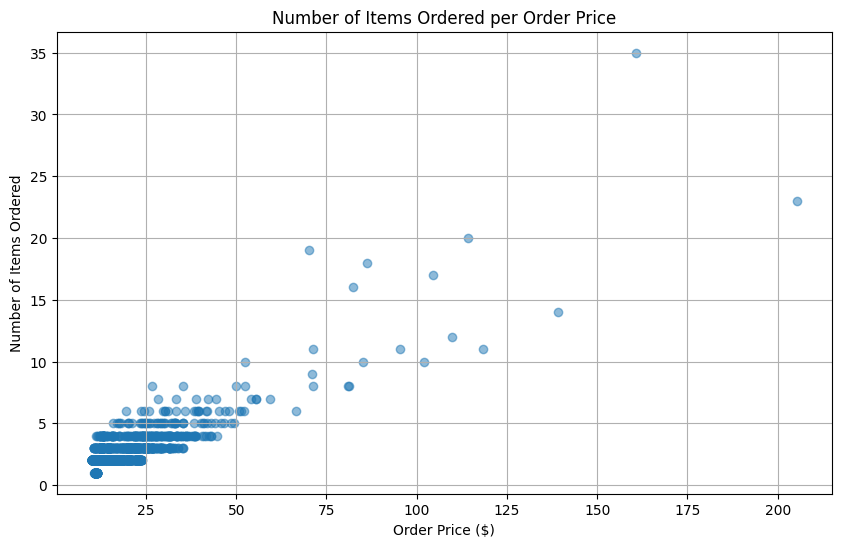

In [8]:
# '$' 제거
chipo['item_price']= chipo['item_price'].str.replace('$','').astype(float)

order_totals = chipo.groupby('order_id')['item_price'].sum()
num_items_per_order = chipo.groupby('order_id')['quantity'].sum()
order_summary = pd.DataFrame({'order_price': order_totals, 'num_items_ordered': num_items_per_order})

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(order_summary['order_price'], order_summary['num_items_ordered'], alpha=0.5)
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

quantity에 따른 item_price

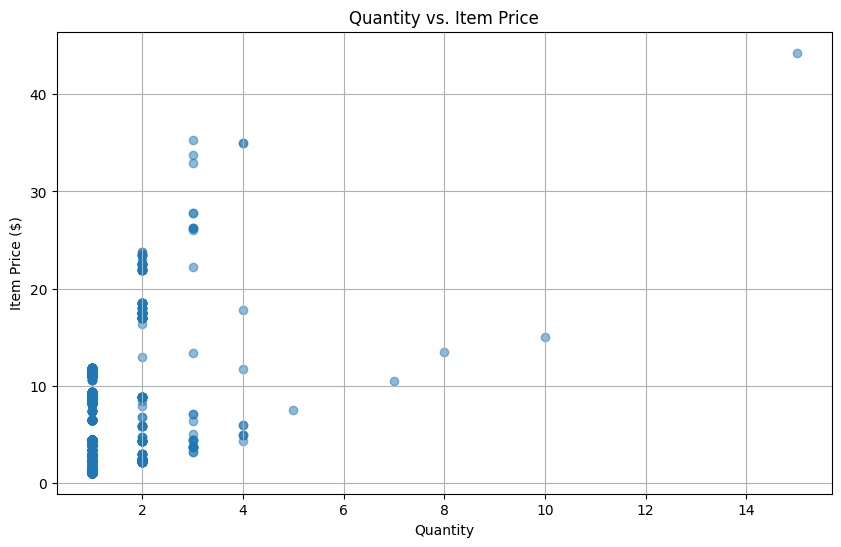

In [9]:
# 주문량(quantity)에 따른 상품 가격(item_price) 그래프 생성
plt.figure(figsize=(10, 6))
plt.scatter(chipo['quantity'], chipo['item_price'], alpha=0.5)
plt.title('Quantity vs. Item Price')
plt.xlabel('Quantity')
plt.ylabel('Item Price ($)')
plt.grid(True)
plt.show()